# Churn
  
### Problem explanation:

The customer churn, also known as customer attrition, refers to the phenomenon whereby __a customer leaves a company__. Some studies confirmed that acquiring new customers can cost five times more than satisfying and retaining existing customers. As a matter of fact, there are a lot of benefits that encourage the tracking of the customer churn rate, for example, marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted, It has a direct impact on the ability to expand the company, etc.

A bank is investigating a very high rate of customer leaving the bank. Here is a 10000 records data set to investigate and predict which of the customers are more likely to leave the bank soon.

This is classification problem and the results are two outputs, customer will leave the bank or he will not. Model inputs are:
 
* Credit score,
* Geography,
* Gender,
* Age,
* Tenure,
* Balance,
* Number of products,
* Has credit card,
* Is active member,
* Estimated salary.

### Problem solution:
The entire data set contains 10000 observations. We divide it into two sets, training set, which contains 8000 observations and test set, which contains 2000 observations. We solved problem in three ways:

* Manually buiilding ANN,
* Tune some hyperparameters by using grid search and
* Employing Black Fox service.

We evaluate the performance of the models using K-fold cross validation. For the purpose of feature scaling, we apply a min max scaler. The independent variables geography and gender are features that are strings so we have to apply label encoder to encode text into numbers and then we can encode geography by one hot encoder. In order to avoid dummy variable trap, for geography we ignored for example feature Germany. To stop the training at the right time, Keras' early stopping scheme is applied.

### Update Keras to latest version

In [1]:
!pip install keras==2.2.4

    100% |████████████████████████████████| 317kB 13.9MB/s ta 0:00:01
  Found existing installation: Keras 2.2.2
    Uninstalling Keras-2.2.2:
      Successfully uninstalled Keras-2.2.2
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Data preprocessing
#### Importing data frame

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib

mpl.style.use('ggplot')
plt.style.use('ggplot')
matplotlib.style.use('ggplot')

dataframe = pd.read_csv('Churn_5k.csv')

#### Dataset info

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
RowNumber          5000 non-null int64
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        5000 non-null int64
Geography          5000 non-null object
Gender             5000 non-null object
Age                5000 non-null int64
Tenure             5000 non-null int64
Balance            5000 non-null float64
NumOfProducts      5000 non-null int64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
Exited             5000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 547.0+ KB


#### Dataset description

In [4]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5037.136200,1.569135e+07,651.229200,38.859400,4.973800,76635.872688,1.529200,0.709200,0.518400,100401.897116,0.202000
std,2870.860248,7.216109e+04,96.177839,10.513636,2.894407,62534.011985,0.572724,0.454177,0.499711,57887.016029,0.401532
min,5.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2590.750000,1.562831e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50781.767500,0.000000
50%,5027.000000,1.569014e+07,653.000000,37.000000,5.000000,97145.940000,1.000000,1.000000,1.000000,100399.670000,0.000000
75%,7527.500000,1.575503e+07,718.000000,44.000000,7.000000,127846.872500,2.000000,1.000000,1.000000,150581.287500,0.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199970.740000,1.000000


#### Histograms of the numerical features

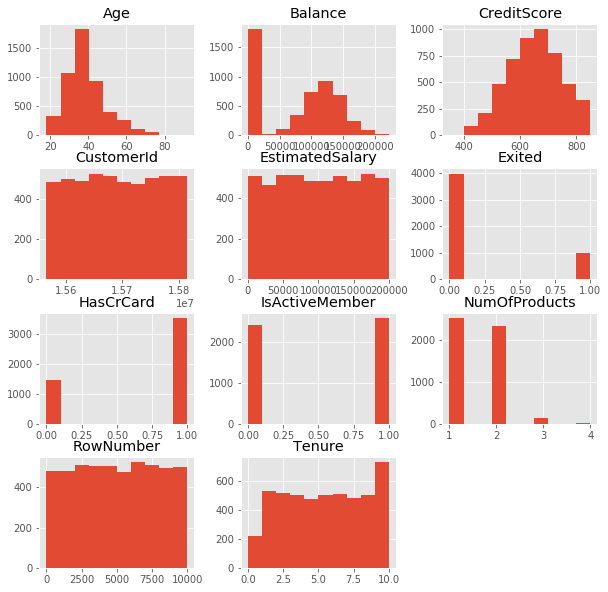

In [5]:
dataframe.hist(figsize=(10,10));

#### Corelation heatmap

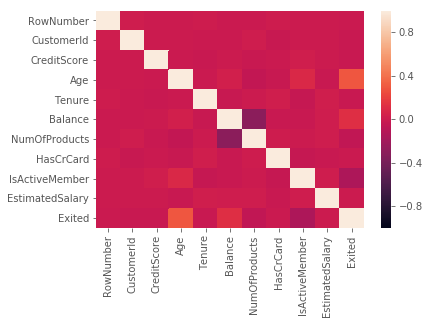

In [6]:
sns.heatmap(dataframe.corr(), vmin=-1, vmax=1);

####  Separate the data frame into feature matrix X and dependent variable y

In [7]:
X = dataframe.iloc[:, 3:13].values
y = dataframe.iloc[:, 13:14].values

#### Encode the categorical variables in our feature matrix

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()

# Encoding geography( countries )
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()

# Encoding gender
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

# OneHotEncoding the countries to make dummy variables for this categorical variable.
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

# To avoid dummy variable trap we remove for example countre Germany.
X = X[:, 1:]

#### Split the entire data set into the training set and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Apply the feature scaling because we don't wanna have any feature dominating another feature

In [10]:
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minMaxScaled = scaler.fit_transform(X_train)
X_test_minMaxScaled = scaler.transform(X_test)

# Option 1 - manually build ANN using Keras

In [88]:
# Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
from keras.callbacks import EarlyStopping

import time
start1 = time.time()

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'auto',
                   #min_delta = 0,
                   patience = 150,
                   verbose = 1,
                   #baseline=0.4,
                   restore_best_weights = True
                  )
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x = X_train_minMaxScaled, y = y_train, validation_split = 0.3, batch_size = 32, epochs = 3000, callbacks = [es], verbose=1)

end1 = time.time()

time1 = int(end1-start1)
minutes1, seconds1= divmod(time1, 60)
hours1, minutes1= divmod(minutes1, 60)

Train on 2800 samples, validate on 1200 samples
Epoch 1/3000
2800/2800 [==============================] - 7s 3ms/step - loss: 0.6566 - acc: 0.7296 - val_loss: 0.6117 - val_acc: 0.7942
Epoch 2/3000
2800/2800 [==============================] - 0s 111us/step - loss: 0.5705 - acc: 0.8018 - val_loss: 0.5415 - val_acc: 0.7942
Epoch 3/3000
2800/2800 [==============================] - 0s 112us/step - loss: 0.5174 - acc: 0.8018 - val_loss: 0.5134 - val_acc: 0.7942
.
.
.


Epoch 1048/3000
2800/2800 [==============================] - 0s 112us/step - loss: 0.3899 - acc: 0.8389 - val_loss: 0.4116 - val_acc: 0.8342
Epoch 1049/3000
2800/2800 [==============================] - 0s 128us/step - loss: 0.3904 - acc: 0.8350 - val_loss: 0.4117 - val_acc: 0.8342
Epoch 1050/3000
2800/2800 [==============================] - 0s 124us/step - loss: 0.3900 - acc: 0.8357 - val_loss: 0.4117 - val_acc: 0.8325
Restoring model weights from the end of the best epoch
Epoch 01050: early stopping


#### Plot loss during training

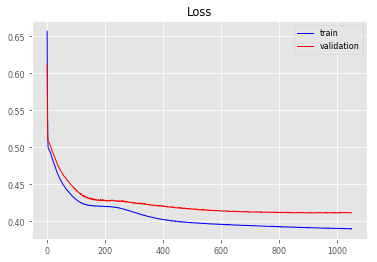

In [90]:
plt.title('Loss')
plt.plot(classifier.history.history['loss'], label = 'train', color = 'blue', linewidth = 1)
plt.plot(classifier.history.history['val_loss'], label = 'validation', color = 'red', linewidth = 1)
plt.legend()
plt.show()

#### Plot accuracy during training

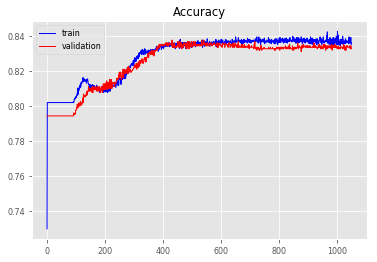

In [91]:
plt.title('Accuracy')
plt.plot(classifier.history.history['acc'], label='train', color = 'blue', linewidth = 1)
plt.plot(classifier.history.history['val_acc'], label='validation', color = 'red', linewidth = 1)
plt.legend()
plt.show()

#### We just trained our artificial neural network on the training set and now it's time to make the prediction on the test set


Time to manually train one network is  377 seconds( 0 hours, 6 minutes and  17 seconds ).

Test set error, which we can read in confusion matrix is 17.6 %.


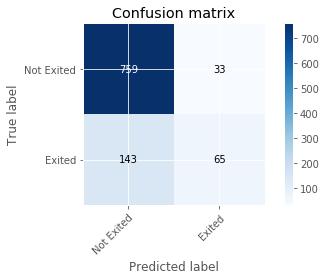

In [19]:
y_pred_trained = classifier.predict(X_test_minMaxScaled)

y_pred_for_confusionMatrix = (y_pred_trained[:,0] > 0.5).reshape(y_pred_trained.shape[0],1)
y_pred_for_confusionMatrix = np.where(y_pred_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_for_confusionMatrix, y_pred_for_confusionMatrix)

errorOnTestSetTrained = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

print("\nTime to manually train one network is ", time1,"seconds(",hours1,"hours,",minutes1,"minutes and ",seconds1,"seconds ).")

# CONFUSION MATRIX IMAGE
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(["Not Exited","Exited"])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax);
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(["Not Exited","Exited"])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_for_confusionMatrix, y_pred_for_confusionMatrix, classes=class_names, normalize=False, title='Confusion matrix');
print("\nTest set error, which we can read in confusion matrix is",errorOnTestSetTrained,"%.")

#### ROC curve and AUC

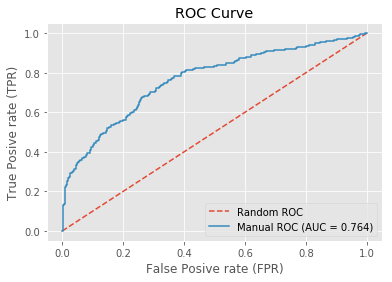

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, y_pred_trained)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_trained)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random ROC')
plt.plot(fpr, tpr, label='Manual ROC (AUC = %.3f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Posive rate (FPR)')
plt.ylabel('True Posive rate (TPR)')
plt.legend(loc ='lower right')
plt.show()

# Option 2 - Parameter tuning by Grid search
We have two type of model parameters, __the weights__ obtained during training process, and parameters that stay fixed, called the __hyperparameters__. The examples of th hyperparameters are __number of epochs__, __batch size__, __type of optimizer__, __number of layers__, __the number of neurons layers__ etc. The ANN trained in __Option 1__ used fixed values of these hyperparameters, but perhaps some other values would lead us to a better accuracy.

The parameter tuning is all about finding the best values of the hyperparameters. We will try this using a simple technique called __Grid search__ that will test several combinations of hyperparameter and return the best choice that leads to the best accuracy obtained by K-fold cross validation.

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

import time
start2 = time.time()

def build_classifier(optimizer):
   classifier = Sequential()
   classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 11))
   classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
   classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
   classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
   return classifier

Tuning_classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [32, 64], 
              'epochs': [3000],
              'optimizer': ['adam', 'adadelta']
             }

grid_search = GridSearchCV(estimator = Tuning_classifier,
                           param_grid = parameters,
                           #scoring = 'accuracy',
                           cv = 5,
                          )

grid_search = grid_search.fit(X_train_minMaxScaled, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters are :\n", best_parameters)
print("\nBest accuracy is :\n", best_accuracy)


end2 = time.time()

time2 = int(end2-start2)
minutes2, seconds2= divmod(time2, 60)
hours2, minutes2= divmod(minutes2, 60)

Epoch 1/3000
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6657 - acc: 0.7315
Epoch 2/3000
2000/2000 [==============================] - 0s 81us/step - loss: 0.5979 - acc: 0.8065
Epoch 3/3000
2000/2000 [==============================] - 0s 83us/step - loss: 0.5420 - acc: 0.8065
.
.
.



Epoch 2998/3000
4000/4000 [==============================] - 0s 41us/step - loss: 0.3827 - acc: 0.8375
Epoch 2999/3000
4000/4000 [==============================] - 0s 41us/step - loss: 0.3827 - acc: 0.8375
Epoch 3000/3000
4000/4000 [==============================] - 0s 41us/step - loss: 0.3827 - acc: 0.8375
Best parameters are :
 {'batch_size': 64, 'epochs': 3000, 'optimizer': 'adadelta'}

Best accuracy is :
 0.82875


#### Our optimized ANN resides in grid_search. Now it's time to make the prediction on the test set


Time needed for tuning is  19820 seconds( 5 hours, 30 minutes and  20 seconds).

Test set error with tuning, which we can read in confusion matrix is 17.4 %.


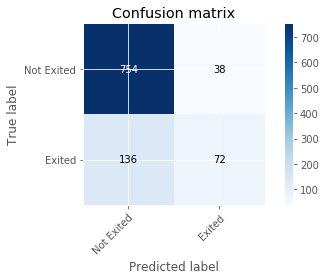

In [22]:
y_pred_tuning = grid_search.predict_proba(X_test_minMaxScaled)
y_pred_tuning = y_pred_tuning[:,1].reshape(y_pred_tuning.shape[0],1)

y_pred_tuning_for_confusionMatrix = (y_pred_tuning[:,0] > 0.5).reshape(y_pred_tuning.shape[0],1)
y_pred_tuning_for_confusionMatrix = np.where(y_pred_tuning_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_for_confusionMatrix, y_pred_tuning_for_confusionMatrix)

errorOnTestSetTuning = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

print("\nTime needed for tuning is ", time2,"seconds(",hours2,"hours,",minutes2,"minutes and ",seconds2,"seconds).")

# CONFUSION MATRIX IMAGE
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(["Not Exited","Exited"])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax);
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(["Not Exited","Exited"])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_for_confusionMatrix, y_pred_tuning_for_confusionMatrix, classes=class_names, normalize=False, title='Confusion matrix');
print("\nTest set error with tuning, which we can read in confusion matrix is",errorOnTestSetTuning,"%.")

#### ROC curve and AUC

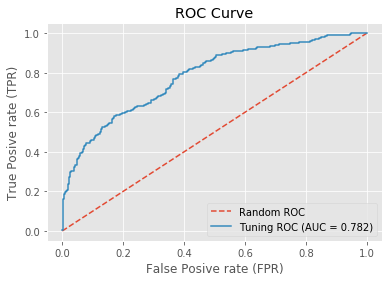

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, y_pred_tuning)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuning)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random ROC')
plt.plot(fpr, tpr, label='Tuning ROC (AUC = %.3f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Posive rate (FPR)')
plt.ylabel('True Posive rate (TPR)')
plt.legend(loc ='lower right')
plt.show()

# Option 3 - Optimize ANN using Black Fox service

#### Install Black fox service

In [11]:
!pip install blackfox

    100% |████████████████████████████████| 51kB 2.7MB/s ta 0:00:011
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Let's run the Black Fox service to find best ANN for the specific problem. Note that we optimize the architecture, as well!

In [12]:
# Importing the BF service libraries and other libraries
from blackfox import BlackFox
from blackfox import KerasOptimizationConfig
from blackfox import OptimizationEngineConfig
import h5py
#from keras.models import load_model
#import numpy as np
#import pandas as pd

blackfox_url = 'http://147.91.204.14:32700'
bf = BlackFox(blackfox_url)

ec = OptimizationEngineConfig(proc_timeout_miliseconds=2000000, population_size=50, max_num_of_generations=20)
c = KerasOptimizationConfig(engine_config=ec, max_epoch =3000, validation_split=0.3, problem_type="BinaryClassification")

import time
start3 = time.time()

# Use CTRL + C to stop optimization
(ann_io, ann_info, ann_metadata) = bf.optimize_keras_sync(
    input_set = X_train,
    output_set = y_train,
    config = c,
    integrate_scaler=False,
    network_path='OptimizedANNChurn_5k_1.h5'
)

end3 = time.time()
time3 = int(end3-start3)

print('\nann info:')
print(ann_info)

print('\nann metadata:')
print(ann_metadata)

Use CTRL + C to stop optimization
Uploading data set
Starting...
2019-04-25 06:25:52.566953 -> Active, Generation: 0/20, Validation set error: 0.000000, Training set error: 0.000000, Epoch: 0, Optimization Id: bc0beade-8f20-44e4-8988-57939408880a
2019-04-25 06:43:36.994987 -> Active, Generation: 1/20, Validation set error: 0.351420, Training set error: 0.353619, Epoch: 113, Optimization Id: bc0beade-8f20-44e4-8988-57939408880a
.
.
.


2019-04-25 08:00:14.384631 -> Stopped, Generation: 19/20, Validation set error: 0.350685, Training set error: 0.330486, Epoch: 1025, Optimization Id: bc0beade-8f20-44e4-8988-57939408880a
stopped Stopped
Saving network becd7ab836489a7d3af0e713891e28fdd15bb1d1 to OptimizedANNChurn_With5k.h5

ann info:
{'dropout': 0.07,
 'hidden_layers': [{'activation_function': 'selu', 'neuron_count': 10}],
 'id': 'becd7ab836489a7d3af0e713891e28fdd15bb1d1',
 'output_layer_activation_function': 'Sigmoid',
 'training_algorithm': 'Nadam'}

ann metadata:
{'__version': 1, 'is_scaler_integrated': False, 'scaler_config': {'input': {'feature_range': [-1, 1], 'fit': [[0.0, 0.0, 350.0, 0.0, 18.0, 0.0, 0.0, 1.0, 0.0, 0.0, 90.07], [1.0, 1.0, 850.0, 1.0, 92.0, 10.0, 222267.63, 4.0, 1.0, 1.0, 199970.74]], 'inverse_transform': False}, 'output': {'feature_range': [0, 1], 'fit': [[0.0], [1.0]], 'inverse_transform': True}}, 'scaler_name': 'MinMaxScaler'}


#### The data set passed to the Black Fox service was not scaled since Black Fox scales inputs automatically. In order to apply obtained ANN in prediction, BlackFox offers the utility function to scale our test set the same way.

In [25]:
# Get metadata
meta = bf.get_metadata('OptimizedANNChurn_5k_1.h5')
scaler_config = meta['scaler_config']

# Scale
x_scaler_config = scaler_config['input']
from sklearn.preprocessing import MinMaxScaler 
min_max_x = MinMaxScaler(feature_range=x_scaler_config['feature_range'])
min_max_x.fit(x_scaler_config['fit'])

X_test_minMaxScaled_withBF = min_max_x.transform(X_test)

#### Prediction using ANN proposed by Black Fox

In [26]:
# Importing ANN model
from keras.models import load_model
model = load_model('OptimizedANNChurn_5k_1.h5')

# Predicted values
y_pred_BF=model.predict(X_test_minMaxScaled_withBF)

#### Rescale

In [27]:
# Rescale
y_scaler_config = scaler_config['output']
min_max_y = MinMaxScaler(feature_range=y_scaler_config['feature_range'])
min_max_y.fit(y_scaler_config['fit'])

y_pred_BF_realValues = min_max_y.inverse_transform(y_pred_BF)

#### Compute error


Time for finding the best ANN by Black Fox service is  5670 seconds( 1 hours, 34 minutes and  30 seconds).

Test set error for finding the best ANN by Black Fox service, which we can read in confusion matrix is 14.7 %.


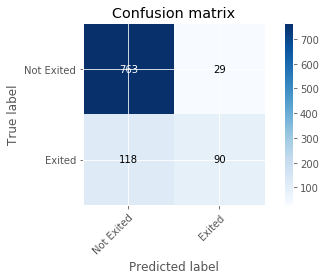

In [28]:
y_pred_BF_for_confusionMatrix = (y_pred_BF_realValues[:,0] > 0.5).reshape(y_pred_BF_realValues.shape[0],1)
y_pred_BF_for_confusionMatrix = np.where(y_pred_BF_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_for_confusionMatrix, y_pred_BF_for_confusionMatrix)

errorOnTestSetBF = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

print("\nTime for finding the best ANN by Black Fox service is ", time3,"seconds(",hours3,"hours,",minutes3,"minutes and ",seconds3,"seconds).")

# CONFUSION MATRIX IMAGE
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(["Not Exited","Exited"])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax);
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #plt.savefig("Churn_grafici/grafik_4.png")
    #plt.savefig("Churn_grafici/grafik_4.svg")
    return ax


np.set_printoptions(precision=2)

class_names = np.array(["Not Exited","Exited"])
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_for_confusionMatrix, y_pred_BF_for_confusionMatrix, classes=class_names, normalize=False, title='Confusion matrix');
print("\nTest set error for finding the best ANN by Black Fox service, which we can read in confusion matrix is",errorOnTestSetBF,"%.")

#### ROC curve and AUC

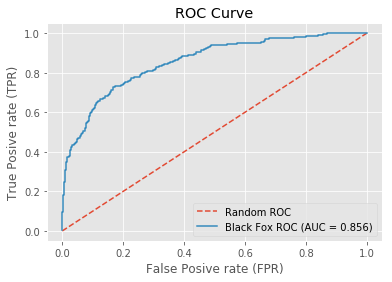

In [29]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, y_pred_BF_realValues)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_BF_realValues)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random ROC')
plt.plot(fpr, tpr, label='Black Fox ROC (AUC = %.3f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Posive rate (FPR)')
plt.ylabel('True Posive rate (TPR)')
plt.legend(loc ='lower right')
plt.show()

# RESULTS AND DISCUSSION

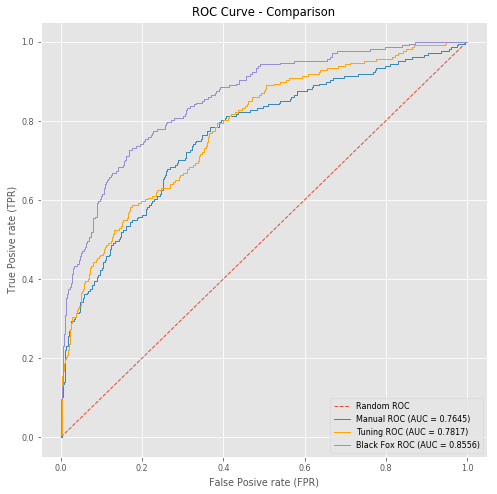

In [35]:
# Comparison
from sklearn.metrics import roc_auc_score, roc_curve
auc_manual = roc_auc_score(y_test, y_pred_trained)
auc_tuned = roc_auc_score(y_test, y_pred_tuning)
auc_BF = roc_auc_score(y_test, y_pred_BF_realValues)

fpr_manual, tpr_manual, thresholds_manual = roc_curve(y_test, y_pred_trained)
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_tuning)
fpr_BF, tpr_BF, thresholds_BF = roc_curve(y_test, y_pred_BF_realValues)

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random ROC');
plt.plot(fpr_manual, tpr_manual, label='Manual ROC (AUC = %.4f)' % auc_manual);
plt.plot(fpr_tuned, tpr_tuned, label='Tuning ROC (AUC = %.4f)' % auc_tuned, color = 'orange');
plt.plot(fpr_BF, tpr_BF, label='Black Fox ROC (AUC = %.4f)' % auc_BF);
plt.title('ROC Curve - Comparison');
plt.xlabel('False Posive rate (FPR)');
plt.ylabel('True Posive rate (TPR)');
plt.legend(loc='lower right');

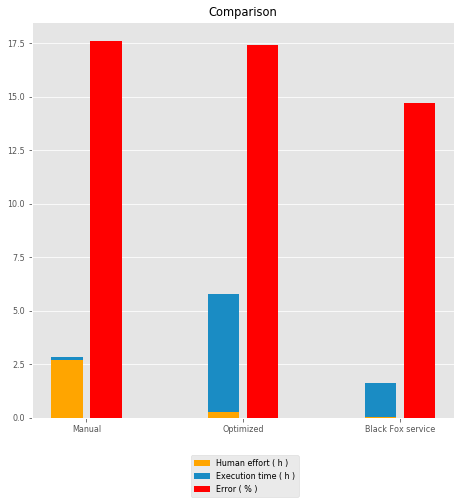

In [32]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=1)
mpl.rc('font', size='8')

n_groups = 3
group_1 = (Human_time1/3600, Human_time2/3600, Human_time3/3600)
group_2 = (time1/3600, time2/3600, time3/3600)
group_3 = (errorOnTestSetTrained, errorOnTestSetTuning, errorOnTestSetBF)

# Create plot
fig, ax = plt.subplots(figsize=(6.5,7))
ax.xaxis.grid(False)
index = np.arange(n_groups)
bar_width = 0.2
space = 0.05
opacity = 1


rects1 = plt.bar(index, group_1, bar_width, color = 'orange',
alpha=opacity,
label='Human effort ( h )')

rects2 = plt.bar(index, group_2, bar_width, bottom =group_1, color = (0.1, 0.55, 0.77),
alpha=opacity,
label='Execution time ( h )')

rects3 = plt.bar(index + bar_width+space, group_3, bar_width, color = 'red',
alpha=opacity,
label='Error ( % )')


plt.title('Comparison')
plt.xticks(index + (bar_width/2 + space/2), ('Manual', 'Optimized', 'Black Fox service'))
plt.legend(loc = (0.376,-0.2))
 
plt.tight_layout()
plt.show()

#### Although we measured this three options, actually they are not so comparable, because in Python we had a man sitting in office and programming those neural networks (options 1 and 2) while in Black Fox service (option 3), he imported the same data set and the service did the rest, while he went to rest or dring coffe, for example, so actually, in Black Fox service he wrote few lines of code and thats all of hard work. Results in the given plots above speak for themself. As you can see, Black Fox service gave better results in less time and effort to create approximate results in Python as Black Fox did is immeasurably large.